In [1]:
import cvxpy as cp
import numpy as np
import pandas as pd
import random as rd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df_WS = pd.read_csv('glm_generation_Austin/Ercot_LZ_SOUTH.csv',parse_dates=True,index_col=[0]) # For year 2016
df_WS.head()

,DA,RT
2016-01-01 00:00:00,18.22,15.48
2016-01-01 00:05:00,18.22,15.48
2016-01-01 00:10:00,18.22,15.48
2016-01-01 00:15:00,18.22,15.33
2016-01-01 00:20:00,18.22,15.33


In [3]:
start = datetime.datetime( 2016, 7, 1)
end = datetime.datetime( 2016, 7, 7, 1, 0)
interval = 300 # interval of market operation
market_intervals = pd.date_range(start,end,freq=str(int(interval/60))+'min')
market_intervals #the first hour in 5 minute increments
index = len(market_intervals)
print(len(market_intervals))

1741


In [4]:
RT = df_WS['RT']
prices = df_WS.RT[0:index]
print(prices)
#print(len(prices))
prices = [0.]*3*12+[1.]*3*12
T = len(prices)
prices

2016-01-01 00:00:00    15.48
2016-01-01 00:05:00    15.48
2016-01-01 00:10:00    15.48
2016-01-01 00:15:00    15.33
2016-01-01 00:20:00    15.33
                       ...  
2016-01-06 22:15:00    19.68
2016-01-06 22:20:00    19.68
2016-01-06 22:25:00    19.68
2016-01-06 22:30:00    19.13
2016-01-06 22:35:00    19.13
Name: RT, Length: 1741, dtype: float64


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [5]:
# Initialize price parameters
#prices = list(range(10,22))
T = len(prices)

#48 intervals of lower, and 48 intervals of higher price

# Initialize variables
SOC = cp.Variable((T+1,))
x = cp.Variable((T,))
#profit = cp.Variable(1,)

# Initialize constraints
constraints = [SOC[0]==2.]
constraints += [SOC[T]==2.]

for t in range(T):
    #constraints += [(-1<=x[t]), (x[t]<=1), 1<=SOC[t], SOC[t]<=5, SOC[t+1]==1*SOC[t]+x[t]/12.]
    constraints += [-1.<=x[t], x[t]<=1., 1.<=SOC[t], SOC[t]<=5., SOC[t+1]==SOC[t]+(x[t]/12)]

    # Objective function
obj = cp.sum(cp.multiply(prices,-x))
obj = cp.Maximize(obj)

In [6]:
# Solve problem
prob = cp.Problem(obj, constraints)
profits = (prob.solve())/12 #returns optimal value = prob.value
print(profits)

2.9999999997145523


In [7]:
SOC_values = SOC.value
print(SOC_values)

[2.         2.08333333 2.16666667 2.25       2.33333333 2.41666667
 2.5        2.58333333 2.66666667 2.75       2.83333333 2.91666667
 3.         3.08333333 3.16666667 3.25       3.33333333 3.41666667
 3.5        3.58333333 3.66666667 3.75       3.83333333 3.91666667
 4.         4.08333333 4.16666667 4.25       4.33333333 4.41666667
 4.5        4.58333333 4.66666667 4.75       4.83333333 4.91666667
 5.         4.91666667 4.83333333 4.75       4.66666667 4.58333333
 4.5        4.41666667 4.33333333 4.25       4.16666667 4.08333333
 4.         3.91666667 3.83333333 3.75       3.66666667 3.58333333
 3.5        3.41666667 3.33333333 3.25       3.16666667 3.08333333
 3.         2.91666667 2.83333333 2.75       2.66666667 2.58333333
 2.5        2.41666667 2.33333333 2.25       2.16666667 2.08333333
 2.        ]


In [8]:
# Print output and solution characteristics

print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value)
print(x)

# is it ok that the x array contains values other than -1, 0, 1?
#for the test, first half is positive because charging, and second half is discharging

status: optimal
optimal value 35.99999999657463
optimal var [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
var1


In [9]:
x_values = x.value
print(x_values)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


In [10]:
Pd = 0
Qd = x_values[0]
SOC = 2
df_store = pd.DataFrame(columns=['timestamp', 'RT', 'SOC_t', 'dispatch'])

In [11]:
len(x_values)

72

In [12]:
(x_values)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.])

In [13]:

first_element=[0]
SOC_values_final = np.delete(SOC_values, first_element)
SOC_values_final.size


72

In [14]:
df_WS = df_WS[~df_WS.index.duplicated(keep='last')]
df_WS_restricted = df_WS.loc[market_intervals]

In [15]:
#df_store['timestamp'] = df_WS_restricted.index
#df_store['RT'] = df_store.timestamp.map(df_WS_restricted['RT'].to_dict())
df_store['timestamp'] = range(len(prices))
df_store['RT'] = prices
df_store['SOC_t'] = SOC_values_final
df_store['dispatch'] = x_values

# df_store.loc[df_store.duplicated(subset='timestamp')]

#df_store.drop_duplicates(subset='timestamp', keep='last', inplace=True)
#get df_store to be same size as x_values and SOC_values
#directly write this array to dataframe column
df_store

,timestamp,RT,SOC_t,dispatch
0,0,0.0,2.083333,1.0
1,1,0.0,2.166667,1.0
2,2,0.0,2.250000,1.0
3,3,0.0,2.333333,1.0
4,4,0.0,2.416667,1.0
...,...,...,...,...
67,67,1.0,2.333333,-1.0
68,68,1.0,2.250000,-1.0
69,69,1.0,2.166667,-1.0
70,70,1.0,2.083333,-1.0


In [16]:
#find when SOC reaches max value
#do not use 
max_timestamp = df_store.loc[df_store.SOC_t >= 4.99, 'timestamp'].iloc[0]
min_timestamp = df_store.loc[df_store.SOC_t <= 1.01, 'timestamp'].iloc[0]
print(max_timestamp)
print(min_timestamp)
time_to_max = pd.date_range(min_timestamp,max_timestamp,freq=str(int(interval/60))+'min')
print(time_to_max)
delta = max_timestamp - min_timestamp
max_to_2max = pd.date_range(max_timestamp,max_timestamp + delta,freq=str(int(interval/60))+'min')
print(max_to_2max)
time_to_max_prices = df_store[df_store.timestamp.isin(time_to_max)]
max_to_2max_prices = df_store[df_store.timestamp.isin(max_to_2max)]
time_to_max_prices.RT.mean(), max_to_2max_prices.RT.mean()

IndexError: single positional indexer is out-of-bounds

In [25]:
def visualize_battery_dispatch(data):
    # Visualize battery dispatch over time as well as the market price
    fig = plt.figure(figsize=(9,3),dpi=150) 
    ax = fig.add_subplot(111)
    
    plot1 = ax.plot(data.timestamp, data.RT, color='xkcd:sky blue', label='RT')
    ax.set_xlabel('Time')
    ax.set_ylabel('Real-time price (USD/MWh)')
    #ax.set_xlim(xmin=data.iloc[0]['timestamp'], xmax=data.iloc[-1]['timestamp']+pd.Timedelta(days=1))
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
    ax.set_ylim(-1,5)

    ax2 = ax.twinx()
    plot2 = ax2.plot(data.timestamp, data.SOC_t, color='orange', label='SOC')
    ax2.set_ylabel('State of Charge')
    ax2.set_ylim(-4,10)
    
    
    ax3 = ax.twinx()
    rspine = ax3.spines['right']
    rspine.set_position(('axes', 1.15))
    ax3.set_frame_on(True)
    ax3.patch.set_visible(False)
    fig.subplots_adjust(right=0.7)

    plot3 = ax3.plot(data.timestamp, data.dispatch, color='red', label='load')
    ax3.set_ylabel('Load Dispatched')
    ax3.set_ylim(-8,2)


    plots = plot1 + plot2 + plot3
    labs = [l.get_label() for l in plots]
    L = ax.legend(plots, labs, bbox_to_anchor=(0.5, -0.4), loc='lower center', ncol=len(labs))

<ipython-input-25-daac4929cbb2>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)


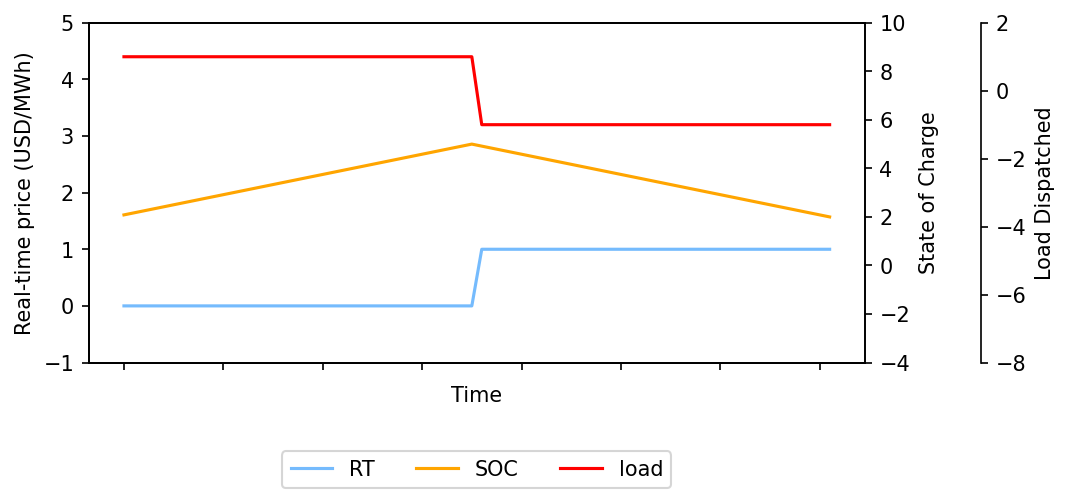

In [26]:
visualize_battery_dispatch(df_store)

In [19]:
# pd.daterange(.rand(), end_whichis_96intervalslater, freq=5)
xs = []
ys = []
for i in range(5000):
    begin_index = rd.sample(range(len(market_intervals)), 1)[0]
    sample_times = market_intervals[begin_index:begin_index+96]
    df_store_sample = df_store[df_store.timestamp.isin(sample_times)]
    
    ys.append(df_store_sample.iloc[:48].RT.mean() - df_store_sample.iloc[48:].RT.mean())
    xs.append(df_store_sample.iloc[:48].dispatch.mean() - df_store_sample.iloc[48:].dispatch.mean())

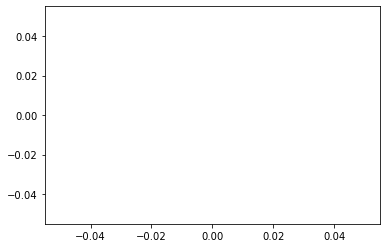

In [20]:
#doesn't dispatch when it is supposed to
plt.scatter(xs, ys)